# Demonstrate several NLP use cases and data insights to have a better grasp of customer feedback of restaurents 

## Introduction to NLP


Natural Language Processing (NLP) is a branch of AI that employs algorithms to comprehend and process human language. Natural Language Processing is used to process and analyze human language using a number of computational approaches, and it is utilized to solve a wide range of real-world problems.

We use machines by teaching them how to understand human language through Natural Language Processing. We primarily employ text data and have computers evaluate and handle vast amounts of it. In today's environment, this type of data is in popular because it contains a great deal of information and insight into corporate operations and profitability.



## Customer feedback using NLP

The qualitative quality of the data, as well as the sometimes massive amount of feedback received, are some of the issues firms encounter when analyzing consumer feedback. Ratings are numerical and hence easy to assess; however, analyzing textual feedback, reviews, and free text is more difficult. Today, we most likely have **Natural Language Processing** and Machine Learning to process massive amounts of text effectively without the need for human participation.


Sentiment analysis (also known as opinion mining) is a natural language processing **(NLP)** technique for determining the positivity, negativity, or neutrality of data. Sentiment analysis is frequently used on textual data to assist organisations in tracking brand and product sentiment in consumer feedback and better understanding customer demands.

## Objectives

1. You need to perform all the tasks from data preprocessing to exploratory data analysis On a given dataset

2. Perform sentiment analysis on a given dataset, Visualize the task to get better overall understanding of people’s opinion. 


## Exploring Data with Pandas 

Pandas is an essential data analysis toolkit for Python.

Pandas is a Python library that provides quick, versatile, and expressive data structures for working with "relational" or "labeled" data. Its goal is to serve as the foundation for undertaking realistic, real-world data analysis in Python.


## Downloading and Prepping Data 

Import Primary Modules. The first thing we'll do is import two key data analysis modules: **pandas** and **numpy**.

In [1]:
import pandas as pd #primary data structure library 
import numpy as np #useful for many scientific computing in python

#### Download the dataset and read it into a pandas dataframe.

Let's use pandas' **read csv()** method to retrieve and import our primary restaurant dataset. Normally, we'd have to download a module that requires pandas to read Excel files before we could accomplish that. **openpyxl** was the name of the module (formerly xlrd). This module has been pre-installed for your convenience, so you don't have to bother about it. Otherwise, you'll have to install the **openpyxl** module using the following line of code:

```
! pip3 install openpyl
````


Download the dataset and read it into a **pandas dataframe**.

In [2]:
df_res=pd.read_csv("E:/Projects/New assessment/dataset-1.csv")
print('Data downloaded and read into a dataframe!')


Data downloaded and read into a dataframe!


Let's use the **head()** function to look at the first five items in our dataset.

In [3]:
df_res.head()

,restaurant name,cost,collections,cuisines,operating timings
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


Using the **tail()** function, we may see the dataset's bottom 5 rows.

In [4]:
df_res.tail()

,restaurant name,cost,collections,cuisines,operating timings
100,IndiBlaze,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,1700,Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


It's always a good idea to start analyzing a dataset by gathering basic information about the dataframe. The **info()** method can be used to accomplish this.

To get a quick summary of the dataframe, use this approach.

In [5]:
df_res.info(verbose=False) #This flag allows you to write more readable by allowing you to visually separate logical sections of the pattern and add comments.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Columns: 5 entries, restaurant name to operating timings
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


We have **1 integer** datatype and **4 are object** datatype columns in our dataset

We can use the data frame's columns instance variable to acquire a list of **column** heads.

In [6]:
df_res.columns

Index(['restaurant name', 'cost', 'collections', 'cuisines',
       'operating timings'],
      dtype='object')

Similarly, we use the .index instance variables to acquire a **list** of indices.

In [7]:
df_res.index

RangeIndex(start=0, stop=105, step=1)

**Note:** The default type of intance variables index and columns are **NOT** list.

In [8]:
print(type(df_res.columns))
print(type(df_res.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


The **tolist()** method can be used to get the index and columns as lists.

In [9]:
list_columns=df_res.columns.tolist()
list_columns

['restaurant name', 'cost', 'collections', 'cuisines', 'operating timings']

In [10]:
df_res.set_index=df_res.index.tolist()
# df_res.set_index

In [11]:
print(type(list_columns))
print(type(df_res.set_index))

<class 'list'>
<class 'list'>


Let's count the number of entries in our dataset.

In [12]:
# print the dimensions of the dataframe
print(df_res.shape)

(105, 5)


**Note:** The main types stored in pandas objects are float, int, bool, datetime64[ns], datetime64[ns, tz], timedelta[ns], category, and object (string). In addition, these dtypes have item sizes, e.g. int64 and int32.

Use **.nunique()** function to find the count of unique values in the Index. Do not include NaN values in the count.

In [13]:
df_res.nunique()

restaurant name      105
cost                  29
collections           42
cuisines              92
operating timings     77
dtype: int64

Let's see unique values in restaurant name index by using **unique()** function

In [14]:
df_res['restaurant name'].unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Kara

In order to remove space between variable names we use rename command to **rename** the column names 
It is essential for using checking value counts in that particular column

In [15]:
df_res.rename(columns={'restaurant name':'restaurant_name','operating timings':'operating_timing'},inplace=True)
df_res.head()

,restaurant_name,cost,collections,cuisines,operating_timing
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


Let's count the number of customers ordered same cuisines by **.value_counts** function
we will see all the categorical variables in value counts

In [16]:
pd.DataFrame(df_res.cuisines.value_counts())

,cuisines
"North Indian, Chinese",4
North Indian,3
"Ice Cream, Desserts",2
"Biryani, North Indian, Chinese",2
"South Indian, North Indian, Chinese",2
...,...
"Biryani, South Indian, North Indian, Chinese, Andhra",1
"Italian, North Indian, South Indian, Asian",1
"North Indian, Fast Food",1
"Arabian, North Indian, Chinese",1


**North Indian, Chinese cuisines has maximum number of value counts it means it is most repeated cuisines**

In [17]:
cost=pd.DataFrame(df_res.cost.value_counts())
cost

,cost
500,13
600,10
700,8
1200,7
400,6
1000,6
200,5
800,5
1500,5
1300,4


**Cost 500 has most number of value count. It means most of the customers prefer low cost of cuisines**

In [18]:
restaurant_name=pd.DataFrame(df_res.restaurant_name.value_counts())
restaurant_name

,restaurant_name
Beyond Flavours,1
Diners Pavilion,1
Squeeze @ The Lime,1
The Old Madras Baking Company,1
Royal Spicy Restaurant,1
...,...
Marsala Food Company,1
Pista House,1
Pot Pourri,1
Hunger Maggi Point,1


**All the data is from different restaurants**

In [19]:
operating_time=pd.DataFrame(df_res.operating_timing.value_counts())
operating_time

,operating_timing
11 AM to 11 PM,6
12 Noon to 11 PM,5
12 Noon to 12 Midnight,5
12 Noon to 10:30 PM,3
11:30 AM to 1 AM,3
...,...
"11:30 AM to 3:30 PM, 6:45 PM to 11:30 PM",1
"12noon to 4:30pm, 6:30pm to 11:30pm (Mon, Tue, Wed, Fri, Sat), Closed (Thu),12noon to 12midnight (Sun)",1
8 AM to 11:30 PM,1
"6:30am to 10:30am, 12:30pm to 3pm, 7pm to 11pm (Mon),6:30am to 10:30am, 12:30pm to 3pm, 7:30pm to 11pm (Tue-Sat),6:30am to 10:30am, 12:30pm to 3:30pm, 7pm to 11pm (Sun)",1


**11 AM to 11 PM is the most visited timing for restaurants**

We enable *normalize* to see the value in the fraction form 

In [20]:
pd.DataFrame(df_res.operating_timing.value_counts(normalize=True))


,operating_timing
11 AM to 11 PM,0.057692
12 Noon to 11 PM,0.048077
12 Noon to 12 Midnight,0.048077
12 Noon to 10:30 PM,0.028846
11:30 AM to 1 AM,0.028846
...,...
"11:30 AM to 3:30 PM, 6:45 PM to 11:30 PM",0.009615
"12noon to 4:30pm, 6:30pm to 11:30pm (Mon, Tue, Wed, Fri, Sat), Closed (Thu),12noon to 12midnight (Sun)",0.009615
8 AM to 11:30 PM,0.009615
"6:30am to 10:30am, 12:30pm to 3pm, 7pm to 11pm (Mon),6:30am to 10:30am, 12:30pm to 3pm, 7:30pm to 11pm (Tue-Sat),6:30am to 10:30am, 12:30pm to 3:30pm, 7pm to 11pm (Sun)",0.009615


In [21]:
cusines=pd.DataFrame(df_res.cuisines.value_counts(normalize=True))
cusines

,cuisines
"North Indian, Chinese",0.038095
North Indian,0.028571
"Ice Cream, Desserts",0.019048
"Biryani, North Indian, Chinese",0.019048
"South Indian, North Indian, Chinese",0.019048
...,...
"Biryani, South Indian, North Indian, Chinese, Andhra",0.009524
"Italian, North Indian, South Indian, Asian",0.009524
"North Indian, Fast Food",0.009524
"Arabian, North Indian, Chinese",0.009524


### We *break* two variables in order to see their *relation* between them by **groupby** function

In [22]:
res=df_res.groupby("restaurant_name").cost.value_counts(normalize=True)
res

restaurant_name                        cost
10 Downing Street                      1900    1.0
13 Dhaba                               450     1.0
3B's - Buddies, Bar & Barbecue         1100    1.0
AB's - Absolute Barbecues              1500    1.0
Absolute Sizzlers                      750     1.0
                                              ... 
Wich Please                            250     1.0
Yum Yum Tree - The Arabian Food Court  1200    1.0
Zega - Sheraton Hyderabad Hotel        1750    1.0
Zing's Northeast Kitchen               550     1.0
eat.fit                                500     1.0
Name: cost, Length: 105, dtype: float64

**10 Downing Street is much expensive amongst the rest of the restaurants cost=1900 and eat.fit is most less expensive restaurant cost = 500 but it also depends on the cuisines**

In [23]:
res.index

MultiIndex([(                    '10 Downing Street', 1900),
            (                             '13 Dhaba',  450),
            (       '3B's - Buddies, Bar & Barbecue', 1100),
            (            'AB's - Absolute Barbecues', 1500),
            (                    'Absolute Sizzlers',  750),
            (                   'Al Saba Restaurant',  750),
            (                  'American Wild Wings',  600),
            (                                 'Amul',  150),
            (                     'Angaara Counts 3',  500),
            (                         'Arena Eleven', 1600),
            ...
            (                           'Tiki Shack', 1000),
            (                             'Triptify',  400),
            (                       'Udipi's Upahar',  500),
            (                           'Ulavacharu', 1400),
            (           'Urban Asia - Kitchen & Bar', 1100),
            (                          'Wich Please',  250),
        

In [24]:
cs=df_res.groupby("cuisines").cost.value_counts(normalize=True)
cs

cuisines                                              cost
American                                              1600    1.0
American, Chinese, North Indian, Kebab, South Indian  1000    1.0
American, Fast Food, Salad, Burger                    600     1.0
American, Wraps, Desserts                             500     1.0
Andhra, Biryani, Hyderabadi, North Indian             500     1.0
                                                             ... 
Seafood, Goan, North Indian, Continental, Asian       1500    1.0
South Indian, North Indian, Chinese                   500     1.0
Street Food, Arabian                                  150     1.0
Street Food, North Indian, Fast Food                  400     1.0
Thai, Asian, Chinese, Malaysian                       1700    1.0
Name: cost, Length: 102, dtype: float64

**American cuisines are more costly than other cuisines**

In [25]:
cr=df_res.groupby("cuisines").restaurant_name.value_counts(normalize=True)
cr

cuisines                                              restaurant_name                       
American                                              B-Dubs                                    1.0
American, Chinese, North Indian, Kebab, South Indian  Hyper Local                               1.0
American, Fast Food, Salad, Burger                    American Wild Wings                       1.0
American, Wraps, Desserts                             The Foodie Monster Kitchen                1.0
Andhra, Biryani, Hyderabadi, North Indian             Kritunga Restaurant                       1.0
                                                                                               ... 
South Indian, North Indian, Chinese                   Mathura Vilas                             0.5
                                                      Udipi's Upahar                            0.5
Street Food, Arabian                                  Mohammedia Shawarma                       1.0
Street 

Let's see the index of the particular variable

In [26]:
cs.index


MultiIndex([(                                                'American', 1600),
            (    'American, Chinese, North Indian, Kebab, South Indian', 1000),
            (                      'American, Fast Food, Salad, Burger',  600),
            (                               'American, Wraps, Desserts',  500),
            (               'Andhra, Biryani, Hyderabadi, North Indian',  500),
            (                           'Andhra, North Indian, Chinese', 1400),
            (                      'Andhra, South Indian, North Indian',  900),
            (                          'Arabian, North Indian, Chinese',  700),
            (                                                   'Asian',  200),
            ('Asian, Continental, North Indian, Chinese, Mediterranean', 1200),
            ...
            (           'North Indian, Japanese, Italian, Salad, Sushi', 1900),
            (                   'North Indian, Mediterranean, European', 1100),
            (           

In [27]:
op=df_res.groupby("operating_timing").cost.value_counts(normalize=True)
op

operating_timing                                     cost
1 PM to 1 AM                                         150     1.0
1 PM to 11 PM                                        1500    1.0
1 PM to 2 AM (Mon, Wed-Sun), Tue Closed              400     1.0
10 AM to 1 AM                                        600     1.0
10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)  350     1.0
                                                            ... 
7 AM to 11 PM                                        350     1.0
8 AM to 11:30 PM                                     700     1.0
8am to 12:30AM (Mon-Sun)                             250     1.0
9 AM to 1 AM                                         600     1.0
9 AM to 10 PM                                        200     1.0
Name: cost, Length: 100, dtype: float64

In [28]:
orn=df_res.groupby("operating_timing").restaurant_name.value_counts(normalize=True)
orn


operating_timing                                     restaurant_name                        
1 PM to 1 AM                                         Mohammedia Shawarma                        1.0
1 PM to 11 PM                                        Komatose - Holiday Inn Express & Suites    1.0
1 PM to 2 AM (Mon, Wed-Sun), Tue Closed              Desi Bytes                                 1.0
10 AM to 1 AM                                        Behrouz Biryani                            1.0
10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)  Cream Stone                                1.0
                                                                                               ... 
7 AM to 11 PM                                        The Old Madras Baking Company              1.0
8 AM to 11:30 PM                                     Cafe Eclat                                 1.0
8am to 12:30AM (Mon-Sun)                             Wich Please                                1.0
9 AM to

In [29]:
op.index

MultiIndex([(                                                                                                                                                            '1 PM to 1 AM', ...),
            (                                                                                                                                                           '1 PM to 11 PM', ...),
            (                                                                                                                                 '1 PM to 2 AM (Mon, Wed-Sun), Tue Closed', ...),
            (                                                                                                                                                           '10 AM to 1 AM', ...),
            (                                                                                                                     '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)', ...),
            (                                

## Data Cleaning

To see how many null objects we have in the dataset, we can use **.isnull()** function

In [30]:
df_res.isnull().sum()

restaurant_name      0
cost                 0
collections         54
cuisines             0
operating_timing     1
dtype: int64

It is showing *54 missing or null values* in collections index and *1 null value* in operating timings 

Let's remove only 1 row which contains null value from index (operating timings) because It may be important column for our data analysis we can not drop a whole columns in case of only one missing value we can ignore it and remove it by **dropna()** command

In [31]:
df_res.dropna(subset=['operating_timing'],inplace=True)
df_res.shape

(104, 5)

Let's clean up the data set by removing a unnecessary collections column that aren't needed and have 54 null values. The **drop()** method of *pandas* can be used as follows:

In [32]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_res.drop(['collections'], axis=1, inplace=True)
df_res.head(2)

,restaurant_name,cost,cuisines,operating_timing
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [33]:
df_res.isnull().sum()

restaurant_name     0
cost                0
cuisines            0
operating_timing    0
dtype: int64

Now, data is cleaned we can use this data to preprocessing 

## Visualizing Data using Matplotlib

### Matplotlib: Standard Python Visualization Library

Matplotlib is a Python 2D plotting package that generates high-quality figures in a range of hardcopy and interactive formats across platforms. Matplotlib is a Python library that may be used in scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

### Matplotlib.Pyplot

**matplotlib.pyplot** is one of Matplotlib's most important features. It's Matplotlib's scripting layer that we looked at in-depthdepth in the Matplotlib videos. Remember that it's a set of command-style functions that allow Matplotlib to behave like MATLAB. Each **pyplot** function modifies a figure in some way, such as creating a figure, a plotting area in a figure, charting certain lines in a plotting area, decorating the plot with labels, and so on. In this lab, we'll learn how to create line plots using the scripting layer. In future labs, we'll get to work with the Artist layer to see how it differs from the scripting layer firsthand.

### Plotting in pandas

In [34]:


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


Visualizing data of different variables by different type of **graphs**

This is plot by **sns.catplot** (scatter plotting)

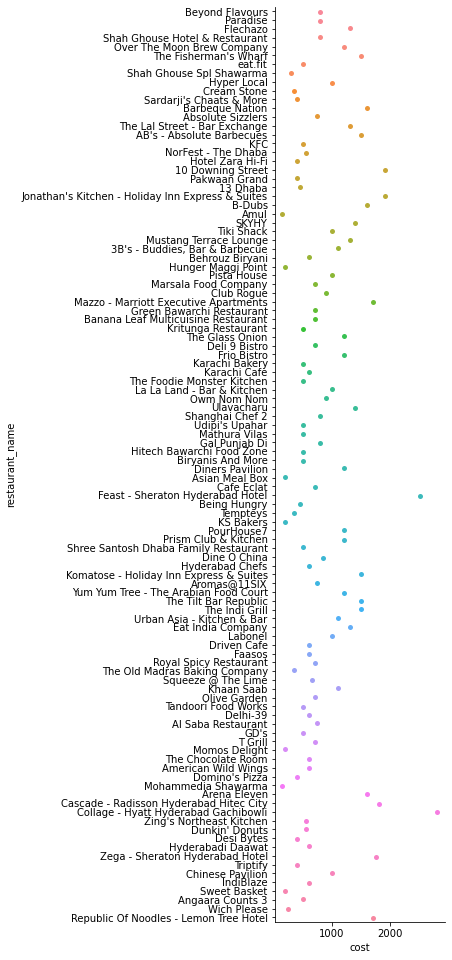

In [35]:
g = sns.catplot(data=df_res, x='cost', y='restaurant_name')
g.fig.set_figwidth(12)
g.fig.set_figheight(15)



**Majority of the data points are between the value 0 to thousand and very few are greater than 1000. It means cost of the restaurant's are between 0 to 1000 mostly and very rare are soo expensive as they are exceeding the cost of 1000.**

Data points are showing relationship between cost and restaurants 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


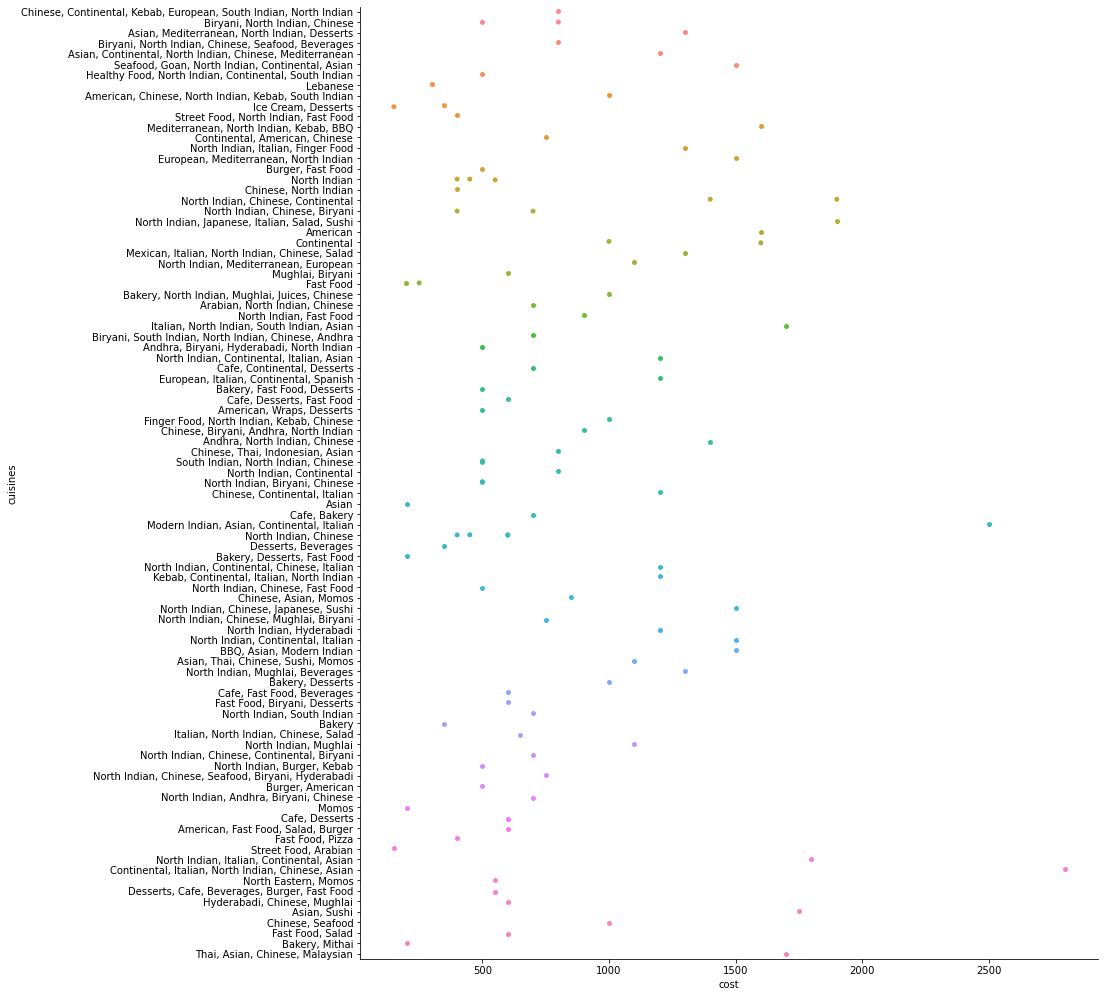

In [36]:
g = sns.catplot(data=df_res, x='cost', y='cuisines')
g.fig.set_figwidth(12)
g.fig.set_figheight(15)



**In that relationship data points are scattered between the range of 200 to 2000. It means cost of the different cuisines are varrying in between 200 to 2000. only 1 cost is too much high which is greater than 2500 it relates I guess to asian, italian, continental cuisines.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


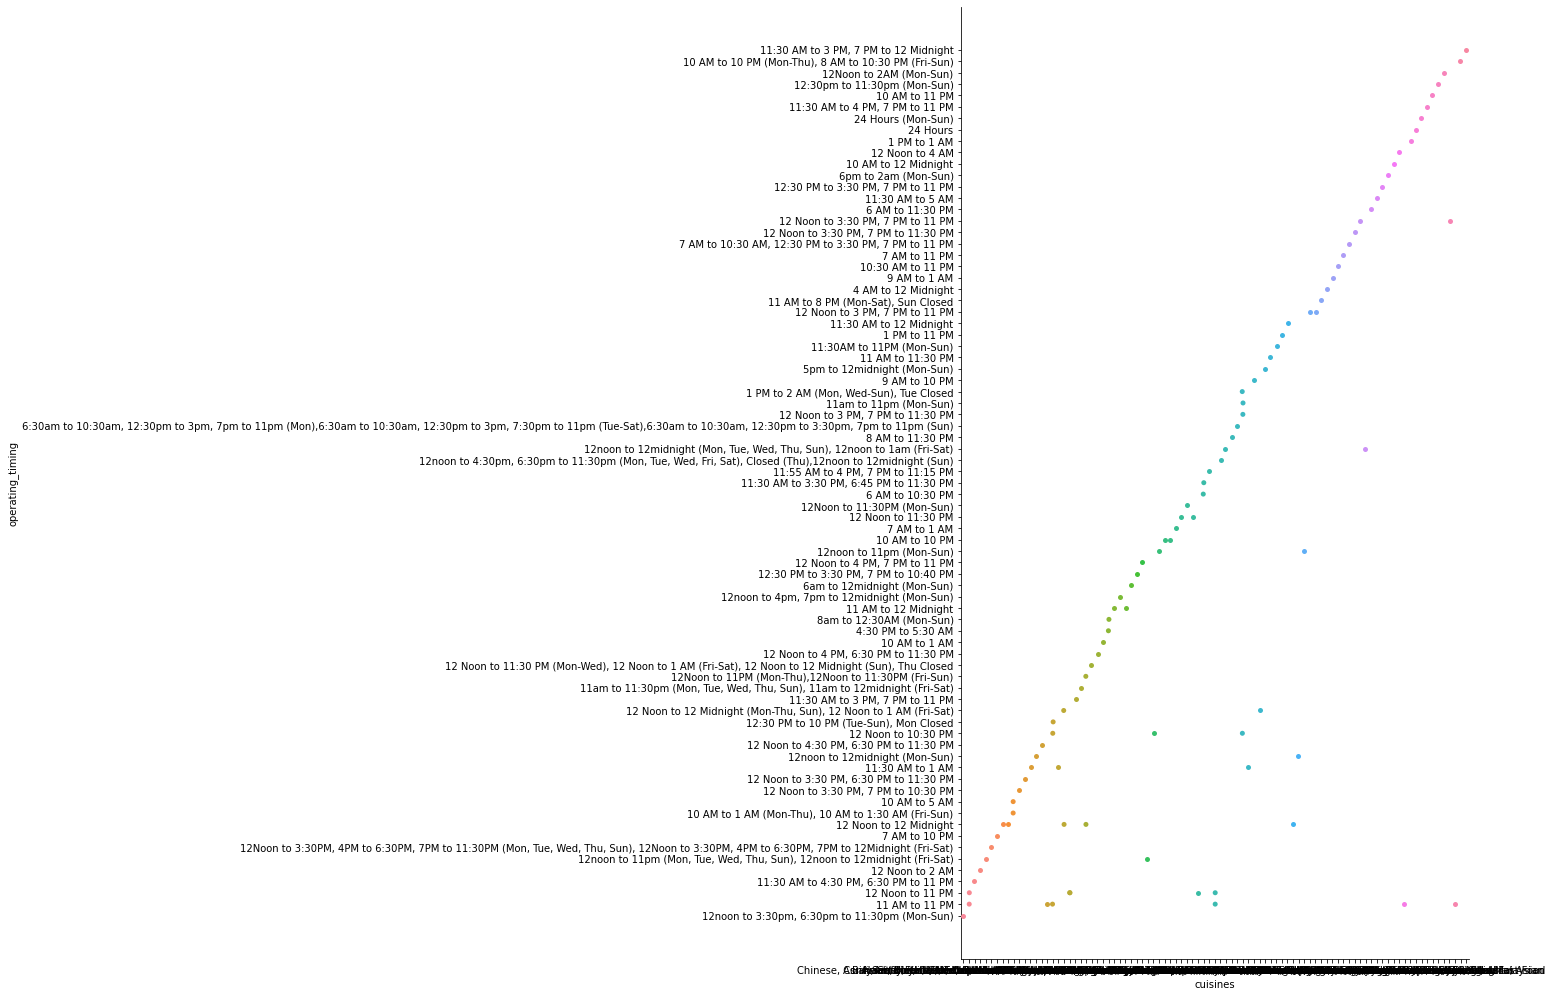

In [37]:
g_1=sns.catplot(x="cuisines",y="operating_timing",data=df_res)
g_1.fig.set_figwidth(8.27)
g_1.fig.set_figheight(15)


**Data points are showing mostly linear relationship between cuisines and operating time and some are scatterd also they are doing over fitting.** 

### Visualization in Pie chart 

Text(0.5, 1.0, 'cost')

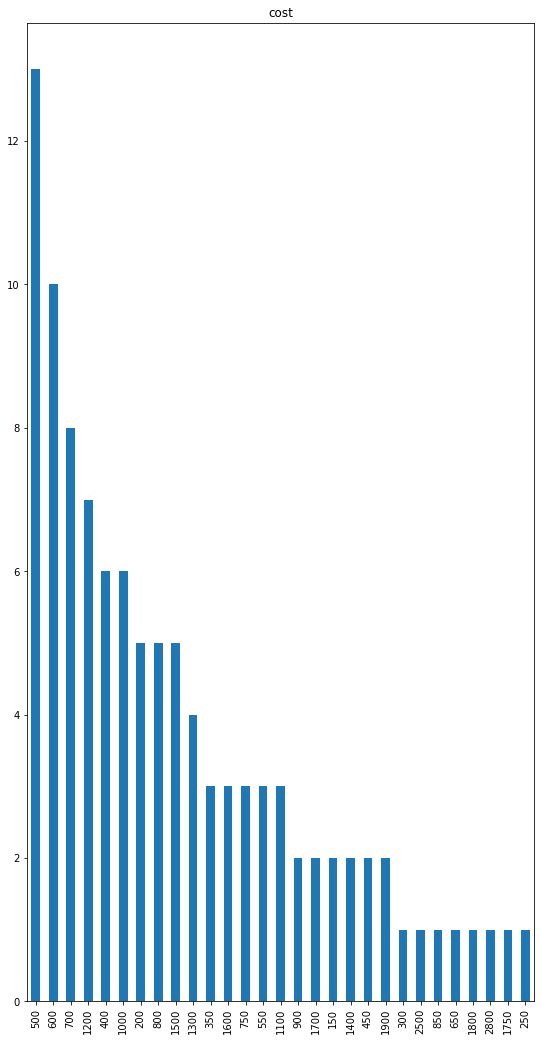

In [38]:
plt.figure(figsize=(20,18))

plt.subplot(1,2,1);df_res.cost.value_counts().plot(kind='bar'); plt.title('cost')


Text(0.5, 1.0, 'cuisines')

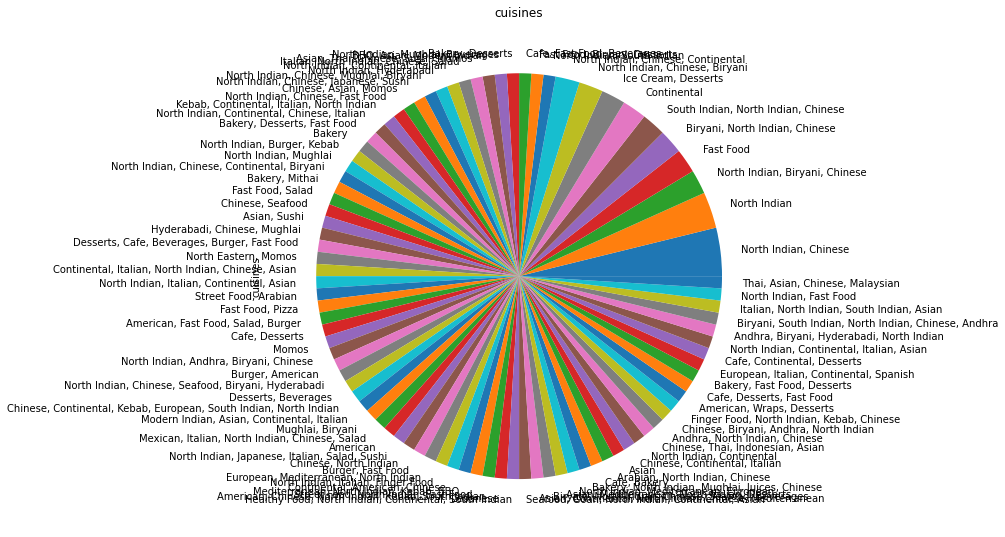

In [39]:
plt.figure(figsize=(20,18))

plt.subplot(1,2,1);df_res.cuisines.value_counts().plot(kind='pie'); plt.title('cuisines')


**This is a quick graphical representation of cuisines**

Text(0.5, 1.0, 'restaurant names')

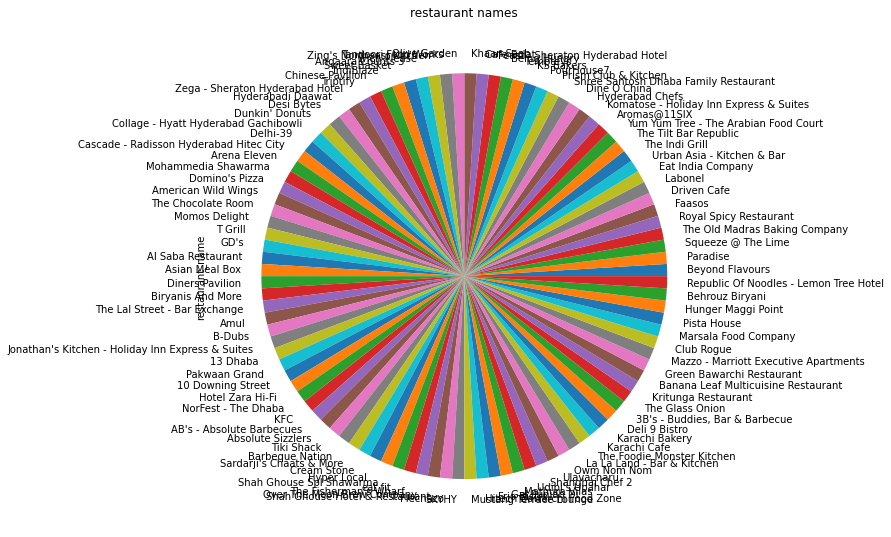

In [40]:
plt.figure(figsize=(20,18))

plt.subplot(1,2,1);df_res.restaurant_name.value_counts().plot(kind='pie'); plt.title('restaurant names')


**This is a quick graphical representation of restaurant names**


### Visualize in value counts of variables

Text(0.5, 1.0, 'cost')

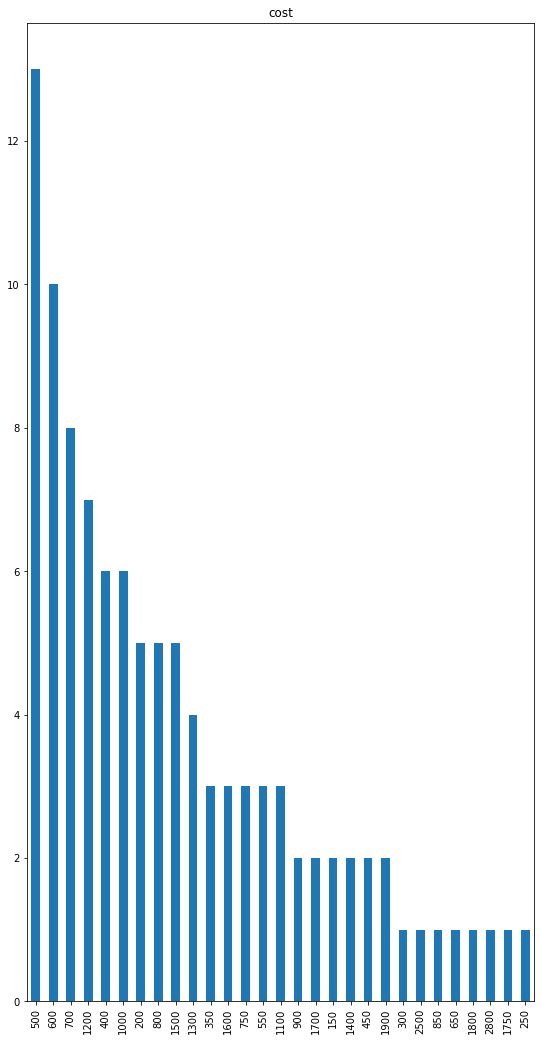

In [41]:
plt.figure(figsize=(20,18))

plt.subplot(1,2,1);df_res.cost.value_counts().plot(kind='bar'); plt.title('cost')


**Cost 500 has most number of value count. It means most of the customers prefer low cost of cuisines**

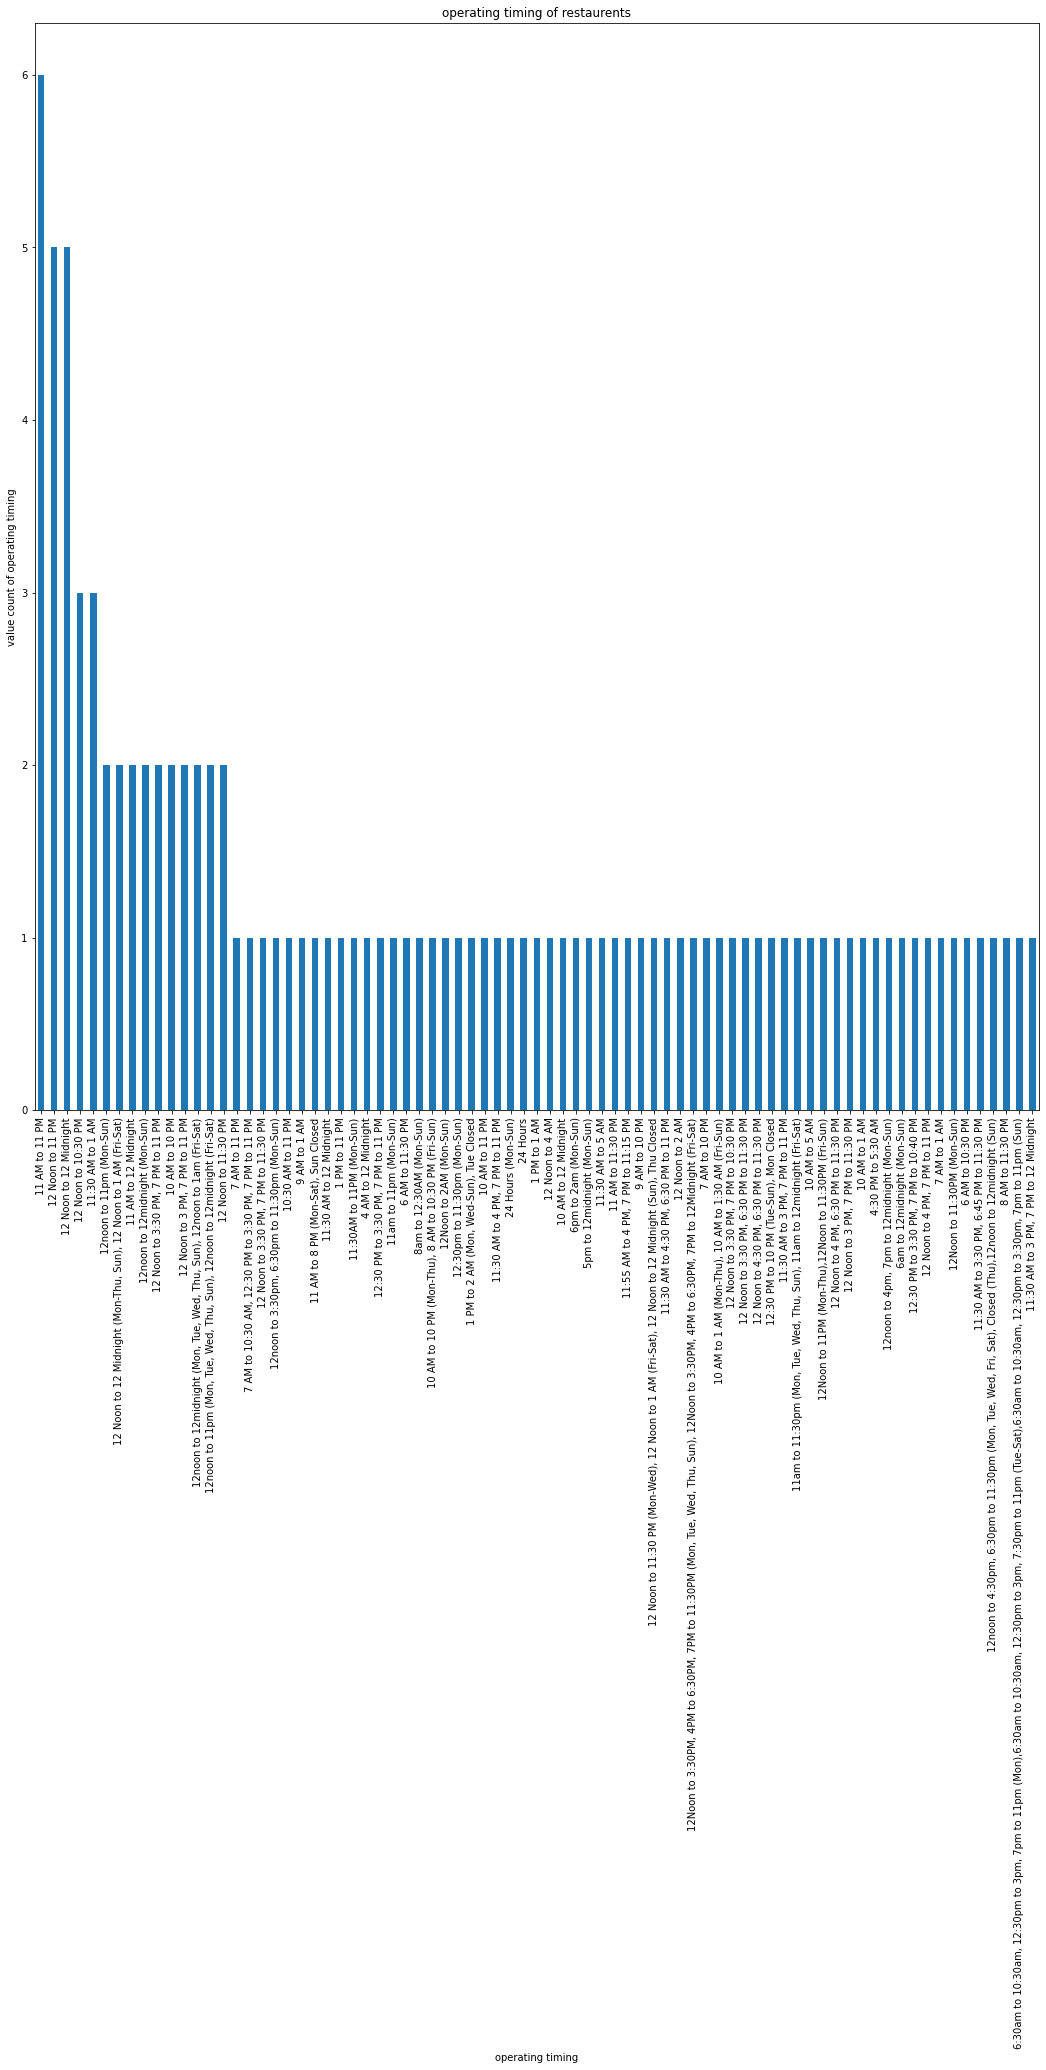

In [42]:
df_res.operating_timing.value_counts().plot(kind='bar', figsize=(18, 20))

# add a title to the histogram
plt.title('operating timing of restaurents')
# add y-label
plt.ylabel('value count of operating timing')
# add x-label
plt.xlabel('operating timing')

plt.show()

**11 AM to 11 PM is the most visited timing for restaurants**

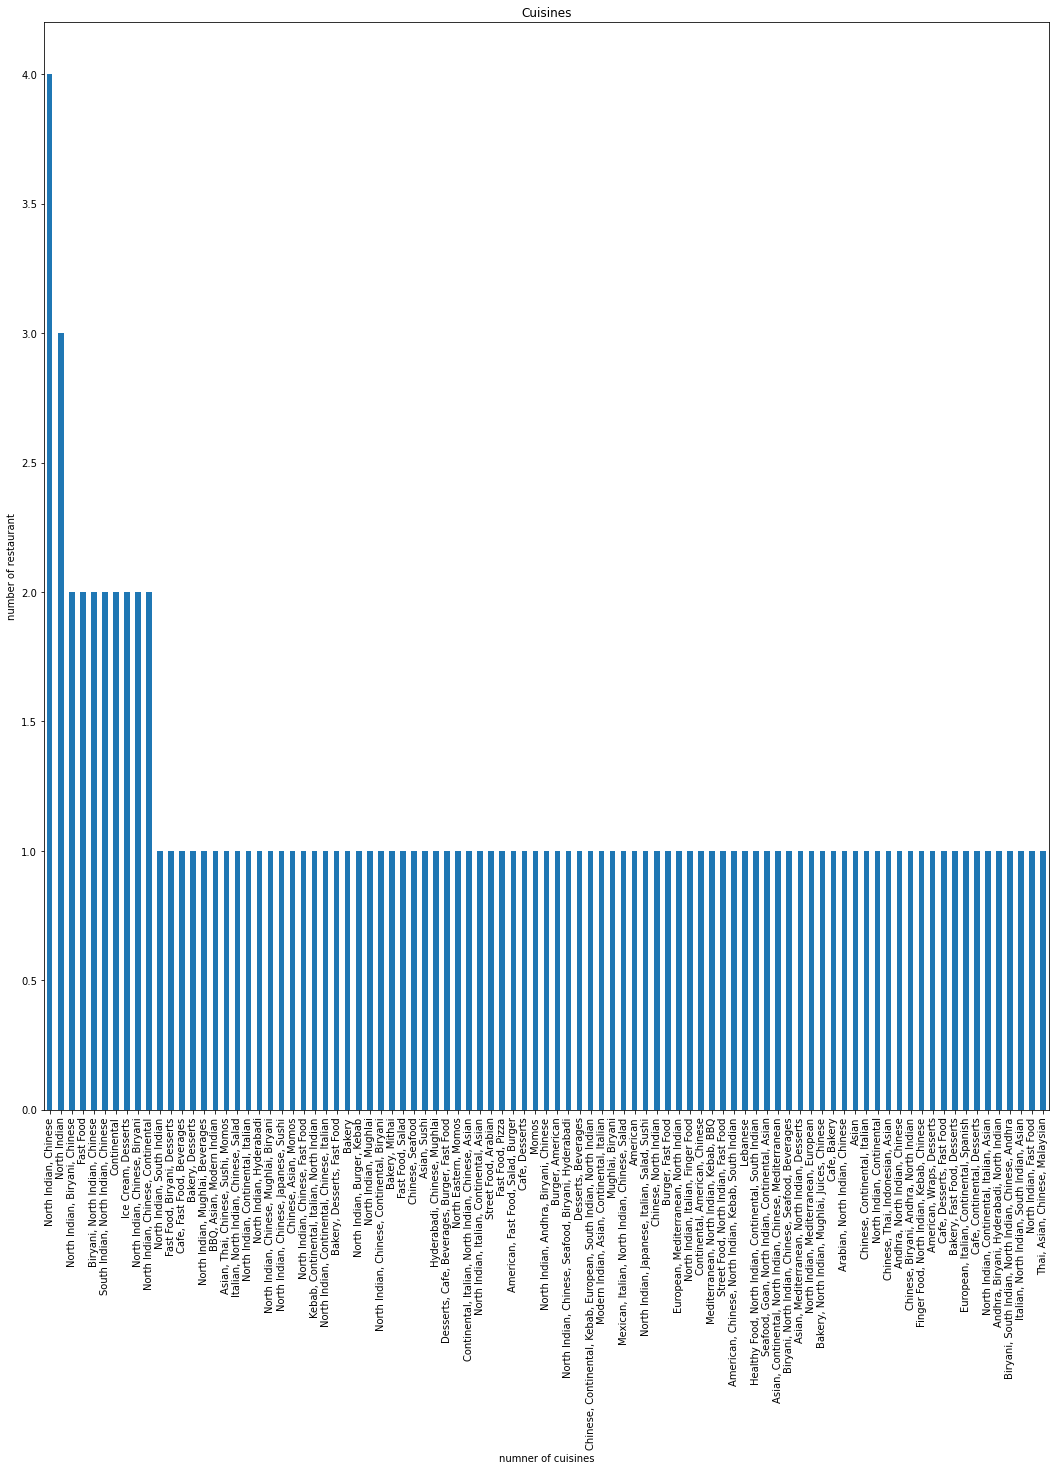

In [43]:
df_res.cuisines.value_counts().plot(kind='bar', figsize=(18, 20))

# add a title to the histogram
plt.title('Cuisines')
# add y-label
plt.ylabel('number of restaurant')
# add x-label
plt.xlabel('numner of cuisines')

plt.show()

**North Indian, Chinese cuisines has maximum number of value counts it means it is most repeated cuisines**

## Encoding The Categorical Data 

Let's first **convert** the categorical data into numerical data because machines understand numerical data 

We can do *label encoding* from the preprocessing library in sklearn

### Introduction to Sklearn Library 

Sklearn is Python's most useful and robust machine learning library. It uses a Python consistency interface to give a set of efficient tools for machine learning and statistical modelling, such as classification, regression, clustering, and dimensionality reduction.

Let's transform and fit the data into label encoding  

In [44]:
from sklearn import preprocessing 
label_encoder=preprocessing.LabelEncoder()


df_res['restaurant_name']=label_encoder.fit_transform(df_res['restaurant_name'])
df_res['cuisines']=label_encoder.fit_transform(df_res['cuisines'])
df_res['operating_timing']=label_encoder.fit_transform(df_res['operating_timing'])
print(df_res.dtypes)


restaurant_name     int32
cost                int64
cuisines            int32
operating_timing    int32
dtype: object


In [45]:
df_res.head()

,restaurant_name,cost,cuisines,operating_timing
0,17,800,32,56
1,69,800,19,11
2,36,1300,9,21
3,77,800,20,33
4,66,1200,8,52


Now, we can see the graphical representation of all the columns of the dataset by **hist()** command

array([[<AxesSubplot:title={'center':'restaurant_name'}>,
        <AxesSubplot:title={'center':'cost'}>],
       [<AxesSubplot:title={'center':'cuisines'}>,
        <AxesSubplot:title={'center':'operating_timing'}>]], dtype=object)

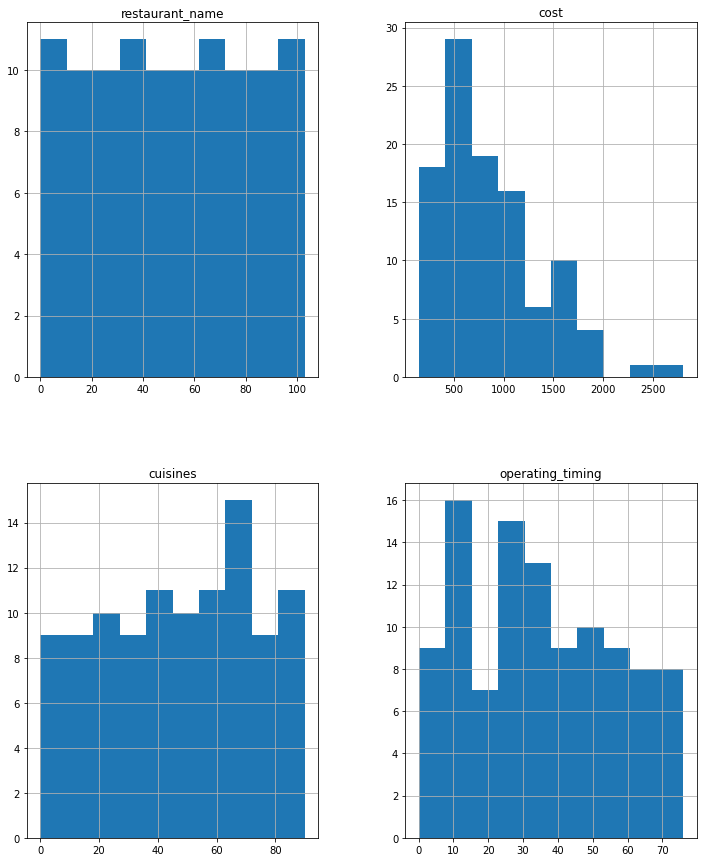

In [46]:
df_res.hist(figsize=(12,15))

**Almost all the variables are balanced for the transform and fit the data into machine learning algorithms to get better results.**

### Looking for Correlations

Let's see correlation amongst the features by **.corr()** function 

In [47]:
corr_matrix=df_res.corr()
corr_matrix


,restaurant_name,cost,cuisines,operating_timing
restaurant_name,1.000000,-0.048549,0.024874,0.133618
cost,-0.048549,1.000000,0.090266,0.174900
cuisines,0.024874,0.090266,1.000000,-0.100630
operating_timing,0.133618,0.174900,-0.100630,1.000000


Explore correlation cost with all variables

In [48]:
corr_matrix['cost'].sort_values(ascending=False)

cost                1.000000
operating_timing    0.174900
cuisines            0.090266
restaurant_name    -0.048549
Name: cost, dtype: float64

Finally, let's view a quick summary of each column in our dataframe using the **describe()** method.

In [49]:
df_res.describe()

,restaurant_name,cost,cuisines,operating_timing
count,104.000000,104.000000,104.000000,104.000000
mean,51.500000,861.057692,46.567308,35.250000
std,30.166206,512.605979,25.702844,21.042144
min,0.000000,150.000000,0.000000,0.000000
25%,25.750000,500.000000,24.750000,16.750000
50%,51.500000,700.000000,48.500000,31.500000
75%,77.250000,1200.000000,66.250000,53.000000
max,103.000000,2800.000000,90.000000,76.000000


### Heatmap 

A heat map is a two-dimensional data visualisation in which colours represent values. A basic heat map can provide a quick visual summary of data. Heat maps with more detail assist the viewer to comprehend more complex data sets.

<AxesSubplot:>

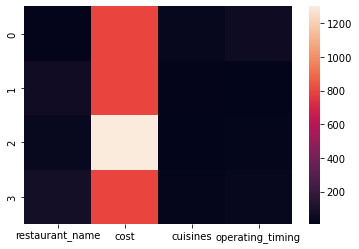

In [50]:
sns.heatmap(df_res[0:4])

## Standardize the Data 

- Standardizing can help features arrive in more digestible for the algorithms 
- Basically get to solutions
- Standardization transform data to have a mean of zero and a standard deviation of 1
- Remove the mean and scale to unit variance to standardize characteristics.

In [51]:
scaler=preprocessing.StandardScaler() #use standard scaler from sklearn preprocessing library  
df_res=scaler.fit_transform(df_res) #fit and transform the data set for standardarization 
df_res

array([[-1.14920222, -0.11968915, -0.5695032 ,  0.99089163],
       [ 0.58292866, -0.11968915, -1.07773311, -1.15802998],
       [-0.51630824,  0.86044246, -1.4686792 , -0.68049184],
       [ 0.84941034, -0.11968915, -1.0386385 , -0.10744608],
       [ 0.48299803,  0.66441614, -1.50777381,  0.79987638],
       [ 1.18251243,  1.2524951 ,  1.54160568,  0.75212256],
       [ 1.71547578, -0.70776811,  0.05601055,  1.65944502],
       [ 0.88272055, -1.09982075,  0.2905782 , -0.20295371],
       [-0.18320615,  0.27236349, -1.78143607, -0.20295371],
       [-0.91603075, -1.00180759,  0.13419976, -1.49230667],
       [ 0.81610013, -0.90379443,  1.65888951,  0.08356917],
       [-1.24913285,  1.44852142,  0.32967281,  0.03581536],
       [-1.58223494, -0.21770231, -0.37403015, -0.96701472],
       [ 1.31575327,  0.86044246,  1.30703803,  0.94313782],
       [-1.61554515,  1.2524951 , -0.17855711,  0.37009205],
       [-0.08327552, -0.70776811, -0.92135468, -1.15802998],
       [ 0.41637762, -0.

Task 1 is completed, the data is ready to use in algorithms after definig independent and dependent variables. My 1st task was  perform all the tasks from data preprocessing to exploratory data analysis On a given dataset not to build a predictive model for that reason I have not defined feature and target variables. 

### Conclusion of the Task:1

From this dataset, I have extracted some insights will be the usefull for the customer feedback. They are as follows:
- Cost 500 has most number of value count. It means most of the customers prefer low cost of cuisines
- 11 AM to 11 PM is the most visited timing for restaurants
- In that relationship data points are scattered between the range of 200 to 2000.
- It means cost of the different cuisines are varrying in between 200 to 2000. 
- only 1 cost is too much high which is greater than 2500 it relates I guess to asian, italian, continental cuisines
- Majority of the data points are between the value 0 to thousand and very few are greater than 1000.
- It means cost of the restaurant's are between 0 to 1000 mostly and very rare are soo expensive as they are exceeding the cost of 1000
- American cuisines are more costly than other cuisines
- 10 Downing Street is much expensive amongst the rest of the restaurants cost=1900 and eat.fit is most less expensive restaurant cost = 500 but it also depends on the cuisines